In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import string
from nltk.classify import NaiveBayesClassifier

In [8]:
ds=pd.read_csv("Book2.csv")
ds.tail()

,type,posts
1441,ENFJ,'You are such a good friend. She is lucky to ...
1442,INTP,'I'm realising the last time I posted on here ...
1443,INFP,'http://www.youtube.com/watch?v=6JmWdK8lcds S...
1444,INTJ,'Is she romantically interested in you?|||An E...
1445,INFJ,"'I have never read about INFPs mimicking Ni, b..."


In [9]:
ds.shape # counting no. of rows, columns in dataset

(1446, 2)

In [50]:
ds.isnull().any() #checking for null values in dataset

type     False
posts    False
dtype: bool

In [10]:
ds.iloc[0,1].split('|||') #iloc:selecting rows ,[0,1]:selecting 0th row i.e first row and 1st i.e 2nd column from dataset

["'http://www.youtube.com/watch?v=qsXHcwe3krw",
 'http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg',
 'enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks',
 'What has been the most life-changing experience in your life?',
 'http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.',
 'May the PerC Experience immerse you.',
 'The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206',
 "Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...",
 '84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-ho

In [11]:
len(ds.iloc[1,1].split('|||')) #counts no. of post in 2nd row -2nd column ie post column

50

In [12]:
len(ds.iloc[2,1].split('|||'))#counts no. of post in 3rdd row -2nd column ie post column

50

In [13]:
len(ds.iloc[0,1].split('|||'))#counts no. of post in 1st row -2nd column ie post column

50

In [14]:
len(ds.iloc[1444,1].split('|||'))#counts no. of post in 1445th row -2nd column ie post column

50

In [15]:
#From above,we see that each row has 50 posts 
types=np.unique(np.array(ds['type'])) #displays the unique sorted rows in type column and put it in array
types

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

In [16]:
ds['type']

0       INFJ
1       ENTP
2       INTP
3       INTJ
4       ENTJ
        ... 
1441    ENFJ
1442    INTP
1443    INFP
1444    INTJ
1445    INFJ
Name: type, Length: 1446, dtype: object

In [17]:
np.array(ds['type'])

array(['INFJ', 'ENTP', 'INTP', ..., 'INFP', 'INTJ', 'INFJ'], dtype=object)

In [18]:
#counting total posts of each type
total=ds.groupby(['type']).count()*50
total

,posts
type,
ENFJ,1750
ENFP,5300
ENTJ,1850
ENTP,5750
ESFJ,250
ESFP,500
ESTJ,300
ESTP,800
INFJ,11800


In [19]:
allPost=pd.DataFrame() #put array into 2D data
for j in types:
    temp1 = ds[ds['type']==j]['posts'] #making type as columns 
    temp2=[]
    for i in temp1:
        temp2+=i.split('|||')
    temp3=pd.Series(temp2)  #each row is filled in order : creating 1d array i.e data is filled row wise in allPost
    allPost[j]=temp3 

In [20]:
allPost.to_csv('allPost.csv',index=False)

In [21]:
allPost.head()

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
0,'https://www.youtube.com/watch?v=PLAaiKvHvZs,"'He doesn't want to go on the trip without me,...",'You're fired.,'I'm finding the lack of me in these posts ver...,'Why not?,'Edit: I forgot what board this was on.,this is such a catch 22,Splinter Cell Blacklist for Xbox 360.,'http://www.youtube.com/watch?v=qsXHcwe3krw,'I think we do agree. I personally don't consi...,"'Dear INTP, I enjoyed our conversation the o...",'Good one _____ https://www.youtube.com/wat...,'I love feeling affectionate for the one I lov...,'They paint without numbers,'Newton's Universal Gravity Law. I mean seriou...,'I got 593. From what I've read about the Enn...
1,51 :o,I'm still completely in AWE and I'm AMAZED tha...,That's another silly misconception. That appro...,Sex can be boring if it's in the same position...,Any other ESFJs originally mistype as an NFP? ...,I am currently reading 'Artemis Fowl: The Eter...,"I'm here! Although, I'm quite the terrible EST...",ESTPs are generally well liked. If you get hat...,http://41.media.tumblr.com/tumblr_lfouy03PMA1q...,Literature... I'd suggest 'Everyday Zen' by Ch...,"Dear ENTJ sub, Long time no see. Sincerely,...","Of course, to which I say I know; that's my bl...",Kind of an update on my past post above. Whate...,I'd guess at istp too,"Well, if money and time was no object, I would...",GTFO FEELER!
2,I went through a break up some months ago. We ...,"Thanks, everyone. I'm struggling with being se...",But guys... he REALLY wants to go on a super-d...,Giving new meaning to 'Game' theory.,Hello again. Thanks for all your help. I know ...,"Hi all, if you've got some spare time and why ...",Yikes. I do not want power...,I often come off to people with the opposite o...,enfp and intj moments https://www.youtube.com...,Being emotional doesn't automatically make som...,None of them. All other types hurt in deep exi...,Does being absolutely positive that you and yo...,It feels weird being in love for the first tim...,"My best bud is ESFP, very funny, entertaining ...",http://www.oglaf.com/media/comic/failsafe.jpg,A lot of the stuff that you read in the INTP d...
3,ENFJ Puns so many puns.,My husband works an extra job each year to pay...,Never mind. Just go on permanent vacation.,Hello *ENTP Grin* That's all it takes. Than w...,"Of the J functions, I'd say it would be: Fi>Ti...",BABYMETAL are the best band of this decade ht...,Thank you SO SO much. This is what I had plann...,Ask her what you are to her.,What has been the most life-changing experienc...,"I'm a Ch'an Buddhist, so it's a daily thing fo...",Probably a sliding scale that depends on indiv...,"No, I didn't; thank you for a link!",Unsure if i completely understand the question...,"I used to smoke weed alot, everyday from morni...",I'm still laughing! xD http://www.youtube.com...,Don't worry about it. You are trying to make ...
4,Well I personally don't go that much for attra...,He said that it's not like he's asking me to d...,Two months? I wouldn't be crazy about the idea...,This + Lack of Balance and Hand Eye Coordination.,The ESFJs on this site are lovely. I'm general...,Banned for being a fire hazard.,Hi,I'm a euphonium player and a writer,http://www.youtube.com/watch?v=vXZeYwwRDw8 h...,"Glad to know I'm not the only one. I meditate,...",Draco Malfoy also. I'd say he's either 358 or ...,So-called Ti-Si loop (and it can stem from any...,"Not often, but I tend to lose it more when it ...",Jimi Hendrix - The Wind Cries Mary. After all...,"workaround is working for me, and I'm using FF...",My mother-in-law is an ESTJ. She is the epito...


In [22]:
allPost.shape #display no. of rows,column in dataset

(1697, 16)

In [23]:
allPost.shape[0] #no. of rows

1697

In [24]:
allPost.shape[1] #no. of column

16

In [25]:
totalElements=allPost.shape[0]*allPost.shape[1]
totalElements

27152

In [26]:
totalElements=np.size(allPost) #same work as above
totalElements

27152

In [27]:
allPosts=pd.read_csv('allPost.csv')
allPosts.head()

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
0,'https://www.youtube.com/watch?v=PLAaiKvHvZs,"'He doesn't want to go on the trip without me,...",'You're fired.,'I'm finding the lack of me in these posts ver...,'Why not?,'Edit: I forgot what board this was on.,this is such a catch 22,Splinter Cell Blacklist for Xbox 360.,'http://www.youtube.com/watch?v=qsXHcwe3krw,'I think we do agree. I personally don't consi...,"'Dear INTP, I enjoyed our conversation the o...",'Good one _____ https://www.youtube.com/wat...,'I love feeling affectionate for the one I lov...,'They paint without numbers,'Newton's Universal Gravity Law. I mean seriou...,'I got 593. From what I've read about the Enn...
1,51 :o,I'm still completely in AWE and I'm AMAZED tha...,That's another silly misconception. That appro...,Sex can be boring if it's in the same position...,Any other ESFJs originally mistype as an NFP? ...,I am currently reading 'Artemis Fowl: The Eter...,"I'm here! Although, I'm quite the terrible EST...",ESTPs are generally well liked. If you get hat...,http://41.media.tumblr.com/tumblr_lfouy03PMA1q...,Literature... I'd suggest 'Everyday Zen' by Ch...,"Dear ENTJ sub, Long time no see. Sincerely,...","Of course, to which I say I know; that's my bl...",Kind of an update on my past post above. Whate...,I'd guess at istp too,"Well, if money and time was no object, I would...",GTFO FEELER!
2,I went through a break up some months ago. We ...,"Thanks, everyone. I'm struggling with being se...",But guys... he REALLY wants to go on a super-d...,Giving new meaning to 'Game' theory.,Hello again. Thanks for all your help. I know ...,"Hi all, if you've got some spare time and why ...",Yikes. I do not want power...,I often come off to people with the opposite o...,enfp and intj moments https://www.youtube.com...,Being emotional doesn't automatically make som...,None of them. All other types hurt in deep exi...,Does being absolutely positive that you and yo...,It feels weird being in love for the first tim...,"My best bud is ESFP, very funny, entertaining ...",http://www.oglaf.com/media/comic/failsafe.jpg,A lot of the stuff that you read in the INTP d...
3,ENFJ Puns so many puns.,My husband works an extra job each year to pay...,Never mind. Just go on permanent vacation.,Hello *ENTP Grin* That's all it takes. Than w...,"Of the J functions, I'd say it would be: Fi>Ti...",BABYMETAL are the best band of this decade ht...,Thank you SO SO much. This is what I had plann...,Ask her what you are to her.,What has been the most life-changing experienc...,"I'm a Ch'an Buddhist, so it's a daily thing fo...",Probably a sliding scale that depends on indiv...,"No, I didn't; thank you for a link!",Unsure if i completely understand the question...,"I used to smoke weed alot, everyday from morni...",I'm still laughing! xD http://www.youtube.com...,Don't worry about it. You are trying to make ...
4,Well I personally don't go that much for attra...,He said that it's not like he's asking me to d...,Two months? I wouldn't be crazy about the idea...,This + Lack of Balance and Hand Eye Coordination.,The ESFJs on this site are lovely. I'm general...,Banned for being a fire hazard.,Hi,I'm a euphonium player and a writer,http://www.youtube.com/watch?v=vXZeYwwRDw8 h...,"Glad to know I'm not the only one. I meditate,...",Draco Malfoy also. I'd say he's either 358 or ...,So-called Ti-Si loop (and it can stem from any...,"Not often, but I tend to lose it more when it ...",Jimi Hendrix - The Wind Cries Mary. After all...,"workaround is working for me, and I'm using FF...",My mother-in-law is an ESTJ. She is the epito...


In [28]:
allPosts.isnull().any()

ENFJ    False
ENFP     True
ENTJ     True
ENTP     True
ESFJ     True
ESFP     True
ESTJ     True
ESTP     True
INFJ    False
INFP     True
INTJ     True
INTP    False
ISFJ     True
ISFP    False
ISTJ     True
ISTP     True
dtype: bool

In [29]:
allPost_withoutnull = allPosts.fillna('-') #dropna was dropping all the rows with any column as null making it to 245 rows
allPost_withoutnull.isnull().any()

ENFJ    False
ENFP    False
ENTJ    False
ENTP    False
ESFJ    False
ESFP    False
ESTJ    False
ESTP    False
INFJ    False
INFP    False
INTJ    False
INTP    False
ISFJ    False
ISFP    False
ISTJ    False
ISTP    False
dtype: bool

In [30]:
allPost_withoutnull.shape

(1697, 16)

In [31]:
allPost_withoutnull.to_csv('allPost_withoutnull.csv',index=False)

In [32]:
for j in types:
    allPost_withoutnull[j]=allPost_withoutnull[j].str.replace('https?://(i\.)?(www\.)?(\w+)(\.\w+)(\/)(\w+)(\S+)','-',case=False)
    #replacing the urls by '-'
allPost_withoutnull.head() 

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
0,'-,"'He doesn't want to go on the trip without me,...",'You're fired.,'I'm finding the lack of me in these posts ver...,'Why not?,'Edit: I forgot what board this was on.,this is such a catch 22,Splinter Cell Blacklist for Xbox 360.,'-,'I think we do agree. I personally don't consi...,"'Dear INTP, I enjoyed our conversation the o...",'Good one _____ -,'I love feeling affectionate for the one I lov...,'They paint without numbers,'Newton's Universal Gravity Law. I mean seriou...,'I got 593. From what I've read about the Enn...
1,51 :o,I'm still completely in AWE and I'm AMAZED tha...,That's another silly misconception. That appro...,Sex can be boring if it's in the same position...,Any other ESFJs originally mistype as an NFP? ...,I am currently reading 'Artemis Fowl: The Eter...,"I'm here! Although, I'm quite the terrible EST...",ESTPs are generally well liked. If you get hat...,http://41.media.tumblr.com/tumblr_lfouy03PMA1q...,Literature... I'd suggest 'Everyday Zen' by Ch...,"Dear ENTJ sub, Long time no see. Sincerely,...","Of course, to which I say I know; that's my bl...",Kind of an update on my past post above. Whate...,I'd guess at istp too,"Well, if money and time was no object, I would...",GTFO FEELER!
2,I went through a break up some months ago. We ...,"Thanks, everyone. I'm struggling with being se...",But guys... he REALLY wants to go on a super-d...,Giving new meaning to 'Game' theory.,Hello again. Thanks for all your help. I know ...,"Hi all, if you've got some spare time and why ...",Yikes. I do not want power...,I often come off to people with the opposite o...,enfp and intj moments - sportscenter not top...,Being emotional doesn't automatically make som...,None of them. All other types hurt in deep exi...,Does being absolutely positive that you and yo...,It feels weird being in love for the first tim...,"My best bud is ESFP, very funny, entertaining ...",-,A lot of the stuff that you read in the INTP d...
3,ENFJ Puns so many puns.,My husband works an extra job each year to pay...,Never mind. Just go on permanent vacation.,Hello *ENTP Grin* That's all it takes. Than w...,"Of the J functions, I'd say it would be: Fi>Ti...",BABYMETAL are the best band of this decade -,Thank you SO SO much. This is what I had plann...,Ask her what you are to her.,What has been the most life-changing experienc...,"I'm a Ch'an Buddhist, so it's a daily thing fo...",Probably a sliding scale that depends on indiv...,"No, I didn't; thank you for a link!",Unsure if i completely understand the question...,"I used to smoke weed alot, everyday from morni...",I'm still laughing! xD - -,Don't worry about it. You are trying to make ...
4,Well I personally don't go that much for attra...,He said that it's not like he's asking me to d...,Two months? I wouldn't be crazy about the idea...,This + Lack of Balance and Hand Eye Coordination.,The ESFJs on this site are lovely. I'm general...,Banned for being a fire hazard.,Hi,I'm a euphonium player and a writer,- - On repeat for most of today.,"Glad to know I'm not the only one. I meditate,...",Draco Malfoy also. I'd say he's either 358 or ...,So-called Ti-Si loop (and it can stem from any...,"Not often, but I tend to lose it more when it ...",Jimi Hendrix - The Wind Cries Mary. After all...,"workaround is working for me, and I'm using FF...",My mother-in-law is an ESTJ. She is the epito...


In [33]:
for j in types:
   allPost_withoutnull[j]=allPost_withoutnull[j].str.replace('https?://(\w+\.)?(\S+.)','-',case=False)
allPost_withoutnull.head()  

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
0,'-,"'He doesn't want to go on the trip without me,...",'You're fired.,'I'm finding the lack of me in these posts ver...,'Why not?,'Edit: I forgot what board this was on.,this is such a catch 22,Splinter Cell Blacklist for Xbox 360.,'-,'I think we do agree. I personally don't consi...,"'Dear INTP, I enjoyed our conversation the o...",'Good one _____ -,'I love feeling affectionate for the one I lov...,'They paint without numbers,'Newton's Universal Gravity Law. I mean seriou...,'I got 593. From what I've read about the Enn...
1,51 :o,I'm still completely in AWE and I'm AMAZED tha...,That's another silly misconception. That appro...,Sex can be boring if it's in the same position...,Any other ESFJs originally mistype as an NFP? ...,I am currently reading 'Artemis Fowl: The Eter...,"I'm here! Although, I'm quite the terrible EST...",ESTPs are generally well liked. If you get hat...,-,Literature... I'd suggest 'Everyday Zen' by Ch...,"Dear ENTJ sub, Long time no see. Sincerely,...","Of course, to which I say I know; that's my bl...",Kind of an update on my past post above. Whate...,I'd guess at istp too,"Well, if money and time was no object, I would...",GTFO FEELER!
2,I went through a break up some months ago. We ...,"Thanks, everyone. I'm struggling with being se...",But guys... he REALLY wants to go on a super-d...,Giving new meaning to 'Game' theory.,Hello again. Thanks for all your help. I know ...,"Hi all, if you've got some spare time and why ...",Yikes. I do not want power...,I often come off to people with the opposite o...,enfp and intj moments - sportscenter not top...,Being emotional doesn't automatically make som...,None of them. All other types hurt in deep exi...,Does being absolutely positive that you and yo...,It feels weird being in love for the first tim...,"My best bud is ESFP, very funny, entertaining ...",-,A lot of the stuff that you read in the INTP d...
3,ENFJ Puns so many puns.,My husband works an extra job each year to pay...,Never mind. Just go on permanent vacation.,Hello *ENTP Grin* That's all it takes. Than w...,"Of the J functions, I'd say it would be: Fi>Ti...",BABYMETAL are the best band of this decade -,Thank you SO SO much. This is what I had plann...,Ask her what you are to her.,What has been the most life-changing experienc...,"I'm a Ch'an Buddhist, so it's a daily thing fo...",Probably a sliding scale that depends on indiv...,"No, I didn't; thank you for a link!",Unsure if i completely understand the question...,"I used to smoke weed alot, everyday from morni...",I'm still laughing! xD - -,Don't worry about it. You are trying to make ...
4,Well I personally don't go that much for attra...,He said that it's not like he's asking me to d...,Two months? I wouldn't be crazy about the idea...,This + Lack of Balance and Hand Eye Coordination.,The ESFJs on this site are lovely. I'm general...,Banned for being a fire hazard.,Hi,I'm a euphonium player and a writer,- - On repeat for most of today.,"Glad to know I'm not the only one. I meditate,...",Draco Malfoy also. I'd say he's either 358 or ...,So-called Ti-Si loop (and it can stem from any...,"Not often, but I tend to lose it more when it ...",Jimi Hendrix - The Wind Cries Mary. After all...,"workaround is working for me, and I'm using FF...",My mother-in-law is an ESTJ. She is the epito...


In [34]:
Filtereddata = pd.DataFrame(allPost_withoutnull)
Filtereddata.to_csv('FinalBook2filtered.csv', index=False)

In [35]:
newdataset=pd.read_csv('FinalBook2filtered.csv')
newdataset.head()

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
0,'-,"'He doesn't want to go on the trip without me,...",'You're fired.,'I'm finding the lack of me in these posts ver...,'Why not?,'Edit: I forgot what board this was on.,this is such a catch 22,Splinter Cell Blacklist for Xbox 360.,'-,'I think we do agree. I personally don't consi...,"'Dear INTP, I enjoyed our conversation the o...",'Good one _____ -,'I love feeling affectionate for the one I lov...,'They paint without numbers,'Newton's Universal Gravity Law. I mean seriou...,'I got 593. From what I've read about the Enn...
1,51 :o,I'm still completely in AWE and I'm AMAZED tha...,That's another silly misconception. That appro...,Sex can be boring if it's in the same position...,Any other ESFJs originally mistype as an NFP? ...,I am currently reading 'Artemis Fowl: The Eter...,"I'm here! Although, I'm quite the terrible EST...",ESTPs are generally well liked. If you get hat...,-,Literature... I'd suggest 'Everyday Zen' by Ch...,"Dear ENTJ sub, Long time no see. Sincerely,...","Of course, to which I say I know; that's my bl...",Kind of an update on my past post above. Whate...,I'd guess at istp too,"Well, if money and time was no object, I would...",GTFO FEELER!
2,I went through a break up some months ago. We ...,"Thanks, everyone. I'm struggling with being se...",But guys... he REALLY wants to go on a super-d...,Giving new meaning to 'Game' theory.,Hello again. Thanks for all your help. I know ...,"Hi all, if you've got some spare time and why ...",Yikes. I do not want power...,I often come off to people with the opposite o...,enfp and intj moments - sportscenter not top...,Being emotional doesn't automatically make som...,None of them. All other types hurt in deep exi...,Does being absolutely positive that you and yo...,It feels weird being in love for the first tim...,"My best bud is ESFP, very funny, entertaining ...",-,A lot of the stuff that you read in the INTP d...
3,ENFJ Puns so many puns.,My husband works an extra job each year to pay...,Never mind. Just go on permanent vacation.,Hello *ENTP Grin* That's all it takes. Than w...,"Of the J functions, I'd say it would be: Fi>Ti...",BABYMETAL are the best band of this decade -,Thank you SO SO much. This is what I had plann...,Ask her what you are to her.,What has been the most life-changing experienc...,"I'm a Ch'an Buddhist, so it's a daily thing fo...",Probably a sliding scale that depends on indiv...,"No, I didn't; thank you for a link!",Unsure if i completely understand the question...,"I used to smoke weed alot, everyday from morni...",I'm still laughing! xD - -,Don't worry about it. You are trying to make ...
4,Well I personally don't go that much for attra...,He said that it's not like he's asking me to d...,Two months? I wouldn't be crazy about the idea...,This + Lack of Balance and Hand Eye Coordination.,The ESFJs on this site are lovely. I'm general...,Banned for being a fire hazard.,Hi,I'm a euphonium player and a writer,- - On repeat for most of today.,"Glad to know I'm not the only one. I meditate,...",Draco Malfoy also. I'd say he's either 358 or ...,So-called Ti-Si loop (and it can stem from any...,"Not often, but I tend to lose it more when it ...",Jimi Hendrix - The Wind Cries Mary. After all...,"workaround is working for me, and I'm using FF...",My mother-in-law is an ESTJ. She is the epito...


In [36]:
newdataset.isnull().any()

ENFJ    False
ENFP    False
ENTJ    False
ENTP    False
ESFJ    False
ESFP    False
ESTJ    False
ESTP    False
INFJ    False
INFP    False
INTJ    False
INTP    False
ISFJ    False
ISFP    False
ISTJ    False
ISTP    False
dtype: bool

In [37]:
newdataset.shape

(1697, 16)

In [38]:
useless_words = nltk.corpus.stopwords.words("english") + list(string.punctuation)
def build_bag_of_words_features_filtered(words):
    words = nltk.word_tokenize(words)
    return {
        word:1 for word in words \
        if not word in useless_words}

In [39]:
build_bag_of_words_features_filtered(newdataset['INTJ'].iloc[1])

{'Dear': 1,
 'ENTJ': 1,
 'sub': 1,
 'Long': 1,
 'time': 1,
 'see': 1,
 'Sincerely': 1,
 'Alpha': 1}

In [41]:
features=[]
for j in types:
    temp1 = newdataset[j]
    temp1 = temp1.dropna() #not all the personality types have same number of files
    features += [[(build_bag_of_words_features_filtered(i), j) \
    for i in temp1]]

In [42]:
#80%training,20%test
split=[]
for i in range(16):
    split += [len(features[i]) * 0.8]
split = np.array(split,dtype = int)

In [43]:
split

array([1357, 1357, 1357, 1357, 1357, 1357, 1357, 1357, 1357, 1357, 1357,
       1357, 1357, 1357, 1357, 1357])

In [44]:
#data for training
train=[]
for i in range(16):
    train += features[i][:split[i]]

In [45]:
#training the model
sentiment_classifier = NaiveBayesClassifier.train(train)

In [46]:
#testing model for accuracy
nltk.classify.util.accuracy(sentiment_classifier, train)*100

58.354826823876195

In [47]:
#creating test data
test=[]
for i in range(16):
    test += features[i][split[i]:]

In [48]:
#testing the model on test dataset
nltk.classify.util.accuracy(sentiment_classifier, test)*100

7.9963235294117645

# Our model accuracy is approx 8% which is bad.

Hence, instead of selecting all 16 types of personalities as a unique feature I explored the dataset further and decided to simplify it.

The Myers Briggs Type Indicator (or MBTI for short) is a personality type system that divides everyone into 16 distinct personality types across 4 axis:

    Introversion (I) – Extroversion (E)
    Intuition (N) – Sensing (S)
    Thinking (T) – Feeling (F)
    Judging (J) – Perceiving (P)

    We will use this and create 4 classifyers to classify the person


In [50]:
#creating copy
newdataset_copy=newdataset.copy()
newdataset_copy

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
0,'-,"'He doesn't want to go on the trip without me,...",'You're fired.,'I'm finding the lack of me in these posts ver...,'Why not?,'Edit: I forgot what board this was on.,this is such a catch 22,Splinter Cell Blacklist for Xbox 360.,'-,'I think we do agree. I personally don't consi...,"'Dear INTP, I enjoyed our conversation the o...",'Good one _____ -,'I love feeling affectionate for the one I lov...,'They paint without numbers,'Newton's Universal Gravity Law. I mean seriou...,'I got 593. From what I've read about the Enn...
1,51 :o,I'm still completely in AWE and I'm AMAZED tha...,That's another silly misconception. That appro...,Sex can be boring if it's in the same position...,Any other ESFJs originally mistype as an NFP? ...,I am currently reading 'Artemis Fowl: The Eter...,"I'm here! Although, I'm quite the terrible EST...",ESTPs are generally well liked. If you get hat...,-,Literature... I'd suggest 'Everyday Zen' by Ch...,"Dear ENTJ sub, Long time no see. Sincerely,...","Of course, to which I say I know; that's my bl...",Kind of an update on my past post above. Whate...,I'd guess at istp too,"Well, if money and time was no object, I would...",GTFO FEELER!
2,I went through a break up some months ago. We ...,"Thanks, everyone. I'm struggling with being se...",But guys... he REALLY wants to go on a super-d...,Giving new meaning to 'Game' theory.,Hello again. Thanks for all your help. I know ...,"Hi all, if you've got some spare time and why ...",Yikes. I do not want power...,I often come off to people with the opposite o...,enfp and intj moments - sportscenter not top...,Being emotional doesn't automatically make som...,None of them. All other types hurt in deep exi...,Does being absolutely positive that you and yo...,It feels weird being in love for the first tim...,"My best bud is ESFP, very funny, entertaining ...",-,A lot of the stuff that you read in the INTP d...
3,ENFJ Puns so many puns.,My husband works an extra job each year to pay...,Never mind. Just go on permanent vacation.,Hello *ENTP Grin* That's all it takes. Than w...,"Of the J functions, I'd say it would be: Fi>Ti...",BABYMETAL are the best band of this decade -,Thank you SO SO much. This is what I had plann...,Ask her what you are to her.,What has been the most life-changing experienc...,"I'm a Ch'an Buddhist, so it's a daily thing fo...",Probably a sliding scale that depends on indiv...,"No, I didn't; thank you for a link!",Unsure if i completely understand the question...,"I used to smoke weed alot, everyday from morni...",I'm still laughing! xD - -,Don't worry about it. You are trying to make ...
4,Well I personally don't go that much for attra...,He said that it's not like he's asking me to d...,Two months? I wouldn't be crazy about the idea...,This + Lack of Balance and Hand Eye Coordination.,The ESFJs on this site are lovely. I'm general...,Banned for being a fire hazard.,Hi,I'm a euphonium player and a writer,- - On repeat for most of today.,"Glad to know I'm not the only one. I meditate,...",Draco Malfoy also. I'd say he's either 358 or ...,So-called Ti-Si loop (and it can stem from any...,"Not often, but I tend to lose it more when it ...",Jimi Hendrix - The Wind Cries Mary. After all...,"workaround is working for me, and I'm using FF...",My mother-in-law is an ESTJ. She is the epito...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,i am the the younger of 2. :),"I don't think I mind being single, but I think...",I hated Mello. He was so irrational and emotio...,"This is just my opinion, but I think that Si-i...",-,-,-,-,Welcome man! This is the best sub forum around...,Oh my. I've been at this very place so often i...,I never got past the smell. Sorry guys :laughing:,"Fool manipulate the ESFP, gain a foothold of y...",-,What does an ISFP seek from a long term relati...,-,I know one ISTJ. Hes really smart when it come...
1693,"I don't wear 

# CLASSES WE HAVE :
class 1 : I/E - Introvert/Extrovert


class 2 : N/S - Intuition/Sensitive


class 3 : T/F - Thinking/Feeling


class 4 : J/P - Judging/Perceiving



# Creating a classifier for class 1 :I/E- Introversion (I) and Extroversion (E)

In [51]:
# Features for the bag of words model
features=[]
for j in types:
    temp1 = newdataset_copy[j]
    temp1 = temp1.dropna() #not all the personality types have same number of files
    if('I' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'introvert') \
        for i in temp1]]
    if('E' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'extrovert') \
        for i in temp1]]

In [69]:
#data for training
train=[]
for i in range(16):
    train += features[i][:split[i]]

In [53]:
#training the model
IntroExtro = NaiveBayesClassifier.train(train)

In [55]:
#Testing the model on the dataset it was trained for accuracy
nltk.classify.util.accuracy(IntroExtro, train)*100

57.401436993367724

In [56]:
#Creating the test data
test=[]
for i in range(16):
    test += features[i][split[i]:]

In [57]:
#Testing the model on the test dataset which it has never seen before

nltk.classify.util.accuracy(IntroExtro, test)*100

49.705882352941174

accuracy improved to 50% , doing same thing for other traits

# creating classifier for class 2 : N/S - Intuition(N)/Sensitive(S)

In [59]:
# Features for the bag of words model
features=[]
for j in types:
    temp1 = newdataset_copy[j]
    temp1 = temp1.dropna() #not all the personality types have same number of files
    if('N' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Intuition') \
        for i in temp1]]
    if('E' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Sensing') \
        for i in temp1]]

In [60]:
#Data for training
train=[]
for i in range(16):
    train += features[i][:split[i]]

    #Training the model
IntuitionSensing = NaiveBayesClassifier.train(train)

#Testing the model on the dataset it was trained for accuracy
nltk.classify.util.accuracy(IntuitionSensing, train)*100


67.6584377302874

In [61]:
#Creating the test data
test=[]
for i in range(16):
    test += features[i][split[i]:]

#Testing the model on the test dataset which it has never seen before
nltk.classify.util.accuracy(IntuitionSensing, test)*100

73.56617647058825

accuracy is approx 73% here.

# creating classifier for class 3 : T/F - Thinking(T)/Feeling(F)

In [63]:
# Features for the bag of words model
features=[]
for j in types:
    temp1 = newdataset_copy[j]
    temp1 = temp1.dropna() #not all the personality types have same number of files
    if('T' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Thinking') \
        for i in temp1]]
    if('F' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Feeling') \
        for i in temp1]]

#Data for training
train=[]
for i in range(16):
    train += features[i][:split[i]]

#Training the model
ThinkingFeeling = NaiveBayesClassifier.train(train)

#Testing the model on the dataset it was trained for accuracy
nltk.classify.util.accuracy(ThinkingFeeling, train)*100

79.50442151805454

In [65]:
#Creating the test data
test=[]
for i in range(16):
    test += features[i][split[i]:]

#Testing the model on the test dataset which it has never seen before
nltk.classify.util.accuracy(ThinkingFeeling, test)*100

53.1985294117647

accuracy is 53%

#  creating classifier for class 4 : J/P - Judging(J)/Perceiving(P)

In [67]:
# Features for the bag of words model
features=[]
for j in types:
    temp1 = newdataset_copy[j]
    temp1 = temp1.dropna() #not all the personality types have same number of files
    if('J' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Judging') \
        for i in temp1]]
    if('P' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Percieving') \
        for i in temp1]]

#Data for training
train=[]
for i in range(16):
    train += features[i][:split[i]]

#Training the model
JudgingPercieiving = NaiveBayesClassifier.train(train)

#Testing the model on the dataset it was trained for accuracy
nltk.classify.util.accuracy(JudgingPercieiving, train)*100

73.61366985998527

In [68]:
#Creating the test data
test=[]
for i in range(16):
    test += features[i][split[i]:]

#Testing the model on the test dataset which it has never seen before
nltk.classify.util.accuracy(JudgingPercieiving, test)*100

48.768382352941174

accuracy = 50% approx

# Summarizing the results of the models

In [71]:
temp = {'train' : [57.401436993367724,67.6584377302874,79.50442151805454,73.61366985998527], 'test' : [49.705882352941174,73.56617647058825,53.1985294117647,48.768382352941174]}
results = pd.DataFrame.from_dict(temp, orient='index', columns=['Introvert - Extrovert', 'Intuition - Sensing', 'Thinking - Feeling', 'Judging - Percieiving'])
results

,Introvert - Extrovert,Intuition - Sensing,Thinking - Feeling,Judging - Percieiving
train,57.401437,67.658438,79.504422,73.613670
test,49.705882,73.566176,53.198529,48.768382


Text(0.5, 1.0, 'Total posts for each personality type')

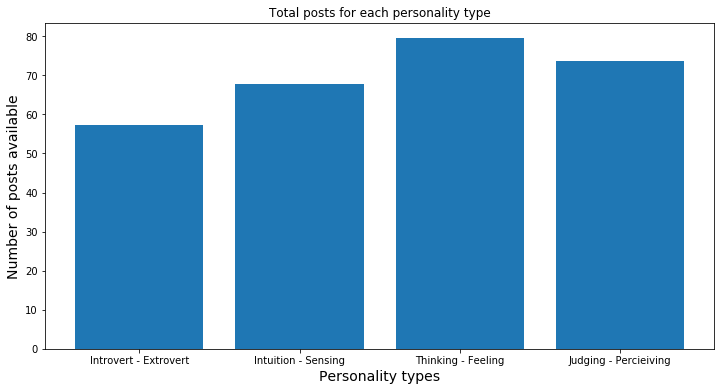

In [72]:
plt.figure(figsize = (12,6))

plt.bar(np.array(results.columns), height = results.loc['train'],)
plt.xlabel('Personality types', size = 14)
plt.ylabel('Number of posts available', size = 14)
plt.title('Total posts for each personality type')

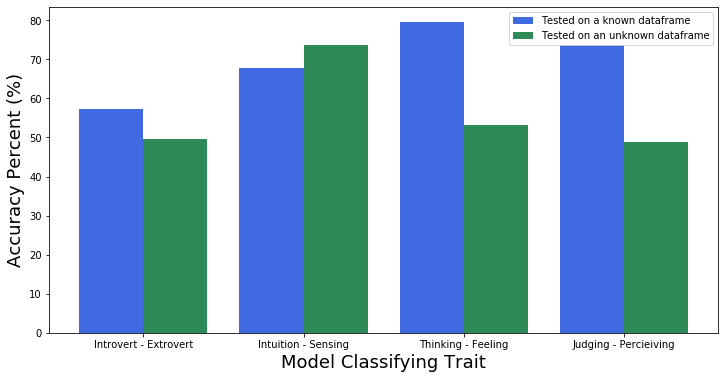

In [73]:
labels = np.array(results.columns)

training = results.loc['train']
ind = np.arange(4)
width = 0.4
fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, training, width, color='royalblue')

testing = results.loc['test']
rects2 = ax.bar(ind+width, testing, width, color='seagreen')

fig.set_size_inches(12, 6)
fig.savefig('Results.png', dpi=200)

ax.set_xlabel('Model Classifying Trait', size = 18)
ax.set_ylabel('Accuracy Percent (%)', size = 18)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(labels)
ax.legend((rects1[0], rects2[0]), ('Tested on a known dataframe', 'Tested on an unknown dataframe'))
plt.show()

# Testing the model

Predicting my brother's personality based on the quora answers

link :https://www.quora.com/profile/Ayush-Sinha-86?q=ayush

In [74]:
#Defining a functions that inputs the writings, tokenizes them and then predicts the output based on our earlier classifiers
def MBTI(input):
    tokenize = build_bag_of_words_features_filtered(input)
    ie = IntroExtro.classify(tokenize)
    Is = IntuitionSensing.classify(tokenize)
    tf = ThinkingFeeling.classify(tokenize)
    jp = JudgingPercieiving.classify(tokenize)
    
    mbt = ''
    
    if(ie == 'introvert'):
        mbt+='I'
    if(ie == 'extrovert'):
        mbt+='E'
    if(Is == 'Intuition'):
        mbt+='N'
    if(Is == 'Sensing'):
        mbt+='S'
    if(tf == 'Thinking'):
        mbt+='T'
    if(tf == 'Feeling'):
        mbt+='F'
    if(jp == 'Judging'):
        mbt+='J'
    if(jp == 'Percieving'):
        mbt+='P'
    return(mbt)

Building another functions that takes all the posts as input and outputs the graph showing percentage of each trait seen in each posts and sums up displaying your personality as the graph title

Note: The input should be an array of your posts


In [75]:
def tellmemyMBTI(input, name, traasits=[]):
    a = []
    trait1 = pd.DataFrame([0,0,0,0],['I','N','T','J'],['count'])
    trait2 = pd.DataFrame([0,0,0,0],['E','S','F','P'],['count'])
    for i in input:
        a += [MBTI(i)]
    for i in a:
        for j in ['I','N','T','J']:
            if(j in i):
                trait1.loc[j]+=1                
        for j in ['E','S','F','P']:
            if(j in i):
                trait2.loc[j]+=1 
    trait1 = trait1.T
    trait1 = trait1*100/len(input)
    trait2 = trait2.T
    trait2 = trait2*100/len(input)
    
    
    #Finding the personality
    YourTrait = ''
    for i,j in zip(trait1,trait2):
        temp = max(trait1[i][0],trait2[j][0])
        if(trait1[i][0]==temp):
            YourTrait += i  
        if(trait2[j][0]==temp):
            YourTrait += j
    traasits +=[YourTrait] 
    
    #Plotting
    
    labels = np.array(results.columns)

    intj = trait1.loc['count']
    ind = np.arange(4)
    width = 0.4
    fig = plt.figure()
    ax = fig.add_subplot(111)
    rects1 = ax.bar(ind, intj, width, color='royalblue')

    esfp = trait2.loc['count']
    rects2 = ax.bar(ind+width, esfp, width, color='seagreen')

    fig.set_size_inches(10, 7)
    
    

    ax.set_xlabel('Finding the MBTI Trait', size = 18)
    ax.set_ylabel('Trait Percent (%)', size = 18)
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(labels)
    ax.set_yticks(np.arange(0,105, step= 10))
    ax.set_title('Your Personality is '+YourTrait,size = 20)
    plt.grid(True)
    
    
    fig.savefig(name+'.png', dpi=200)
    
    plt.show()
    return(traasits)

Importing quora answers from a text file
I copied all my answer from the link i provided before (i broke down the paragraphs as separate posts)

In [86]:
My_writings = open("Myquora.txt")
my_writing = My_writings.readlines()
#my_writing

In [85]:
my_posts = my_writing[0].split('|||')
len(my_posts)
#my_posts

IndexError: list index out of range

In [87]:
my_posts = my_writing[0].split('|||')
len(my_posts)
#my_posts

38

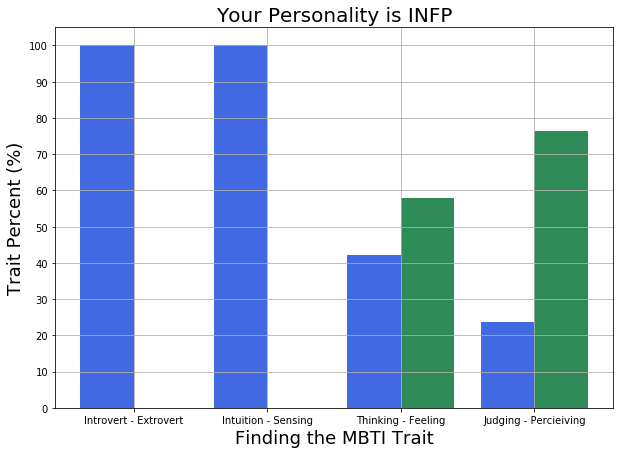

In [88]:
#predicting personality
trait=tellmemyMBTI(my_posts, 'Divy')

In [118]:
My_writings = open("bi.txt")
my_writing = My_writings.readlines()
#my_writing

In [119]:
my_posts = my_writing[0].split('|||')
len(my_posts)
#my_posts

3

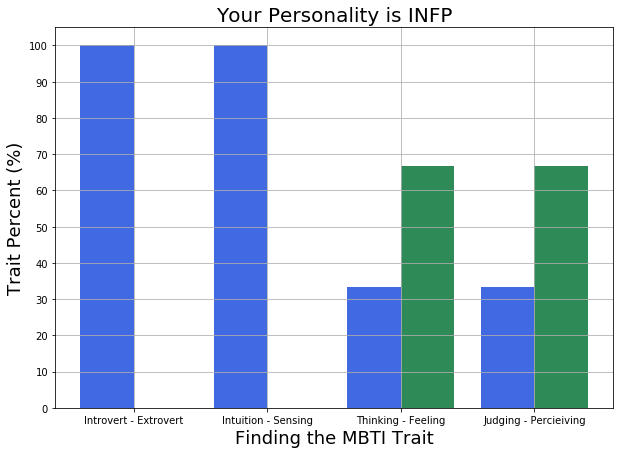

In [121]:
#predicting personality
trait=tellmemyMBTI(my_posts, 'A')